# Import and Setup

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import sys
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

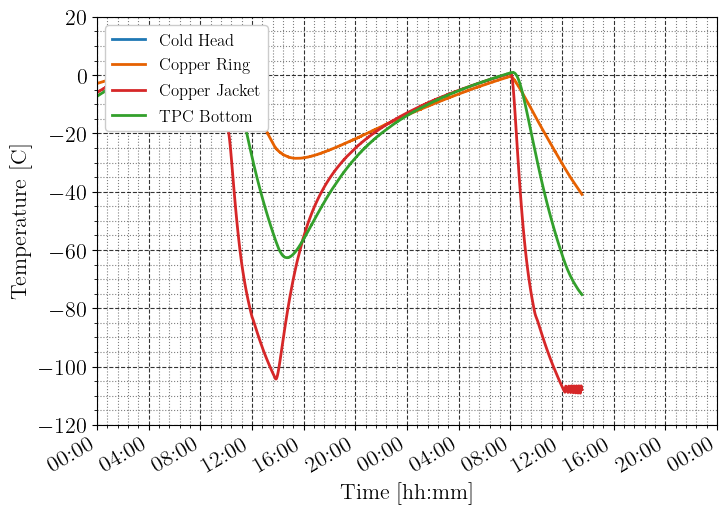

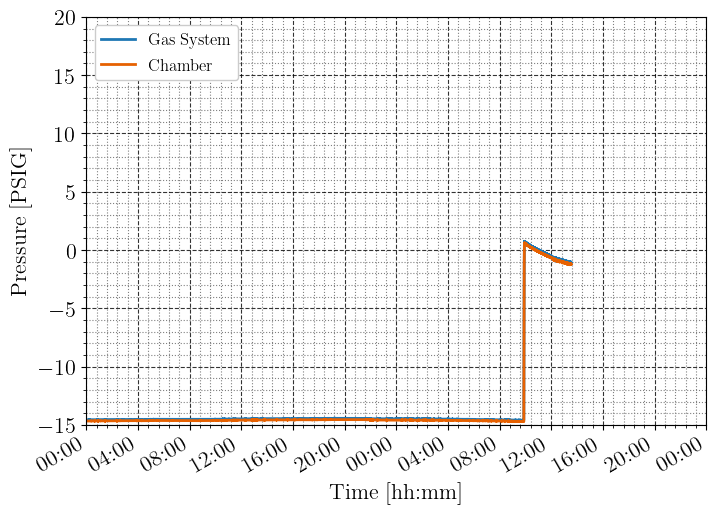

In [2]:
Sensors = []
Files = ['C:/Data/StandStatus/20211118.h5', 'C:/Data/StandStatus/20211119.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,11,18,0,0), dt.datetime(2021,11,20,0,0)]

AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,20])
AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=240, YTicks=5, XRange=XRange, YRange=[-15,20])
# AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850])

In [77]:
D0 = Dataset.Dataset(Path='C:/Data/20211110/', Selection='SiPM_31V_LED_2*.h5')
D0.Ch[1].Pol = 1
for File in D0.Files:
    D0.ImportDataFromHDF5(File, D0.Ch)

Print=True
for ii, ch in enumerate(D0.Ch):
    ch.GetSampling()
    ch.Amp = np.array(ch.Amp)
    ch.TimeStamp = np.array(sorted(ch.TimeStamp))
    ch.Amp = ch.SubtractBaseline(Data=ch.Amp, state=Print)
    ch.GetAllMaxima(Data=ch.Amp, Time=5, state=Print)

 | Subtracting baseline...
 | Getting extrema of individual files...
 | Subtracting baseline...
 | Getting extrema of individual files...


In [78]:
D1 = Dataset.Dataset(Path='C:/Data/20211110/', Selection='SiPM_31V_DCR_LXe*.h5')
D1.Ch[1].Pol = 1
for File in D1.Files:
    D1.ImportDataFromHDF5(File, D1.Ch)

Print=True
for ii, ch in enumerate(D1.Ch):
    ch.GetSampling()
    ch.Amp = np.array(ch.Amp)
    ch.TimeStamp = np.array(sorted(ch.TimeStamp))
    ch.Amp = ch.SubtractBaseline(Data=ch.Amp, state=Print)
    ch.GetAllMaxima(Data=ch.Amp, Time=5, state=Print)


 | Subtracting baseline...
 | Getting extrema of individual files...
 | Subtracting baseline...
 | Getting extrema of individual files...


In [79]:
D2 = Dataset.Dataset(Path='C:/Data/20211110/', Selection='SiPM_31V_SourceFar*.h5')
D2.Ch[1].Pol = 1
print(D2.Files)
for File in D2.Files:
    D2.ImportDataFromHDF5(File, D2.Ch)

Print=True
for ii, ch in enumerate(D2.Ch):
    ch.GetSampling()
    ch.Amp = np.array(ch.Amp)
    ch.TimeStamp = np.array(sorted(ch.TimeStamp))
    ch.Amp = ch.SubtractBaseline(Data=ch.Amp, state=Print)
    ch.GetAllMaxima(Data=ch.Amp, Time=5, state=Print)


['C:/Data/20211110\\SiPM_31V_SourceFar_0.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_1.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_2.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_3.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_4.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_5.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_Second_0.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_Second_1.h5', 'C:/Data/20211110\\SiPM_31V_SourceFar_Second_2.h5']


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

117928


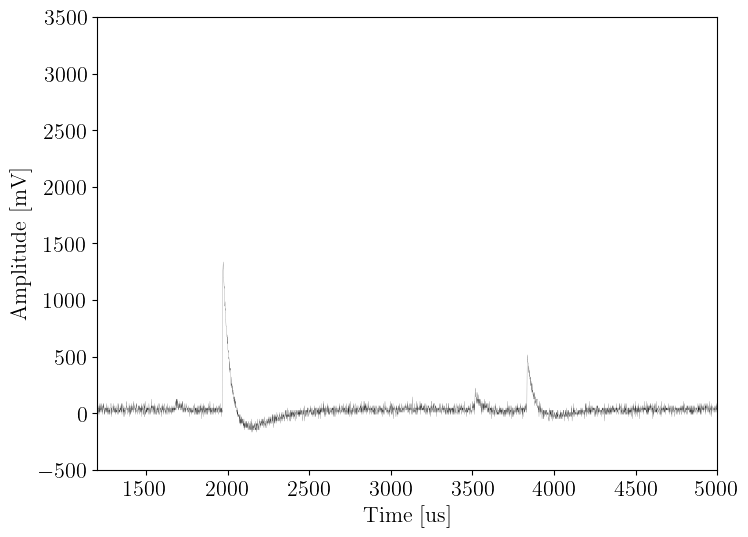

In [ ]:
plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.xlim(1200,5000)
# plt.ylim(-5000,5000)
for x in D2.Ch[1].Amp[-1:]:
    print(len(x))
    plt.plot(D2.Ch[1].Time, x, color='k', lw=0.1)
plt.show()

1251
3


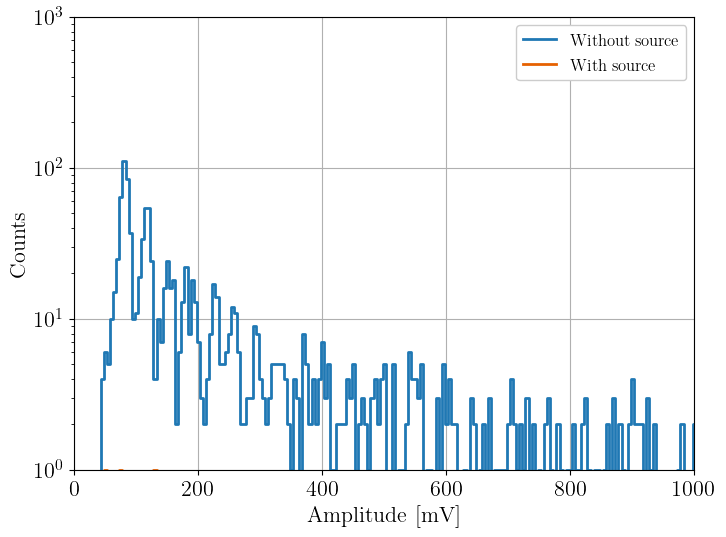

In [ ]:
plt.figure()
plt.xlabel('Amplitude [mV]')
plt.ylabel('Counts')
plt.yscale('log')
plt.xlim(0,1000)
# plt.ylim(0.01,1)
# plt.title('LED Triggered SiPM Spectrum')
plt.grid()

binsize=5
xfit = np.arange(0,3000,10)
h,hx = np.histogram(D1.Ch[1].Max, bins=np.arange(0,2000,binsize))
h2,hx2 = np.histogram(D2.Ch[1].Max, bins=np.arange(0,2000,binsize))

# plt.step(hx[:-1], h/np.max(h), where='mid', label='Without source')
# plt.step(hx2[:-1], h2/np.max(h2), where='mid', label='With source')

plt.step(hx[:-1], h, where='mid', label='Without source')
plt.step(hx2[:-1], h2, where='mid', label='With source')


print(np.sum(h))
print(np.sum(h2))

plt.legend(loc='upper right')

plt.savefig('led_spectrum.pdf')
plt.show()

In [ ]:
delta = dt.datetime(2021,11,10,0,0) - dt.datetime(2021,5,12,0,0)
capdata_last = pd.read_csv("C:/Data/LevelMeter/20210512_liquefaction_10.csv", names=['Time', 'Level'])
timestamp_last = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") + delta for x in capdata_last['Time']])
cap_last = np.array(capdata_last['Level'])

151.8833
152.1077


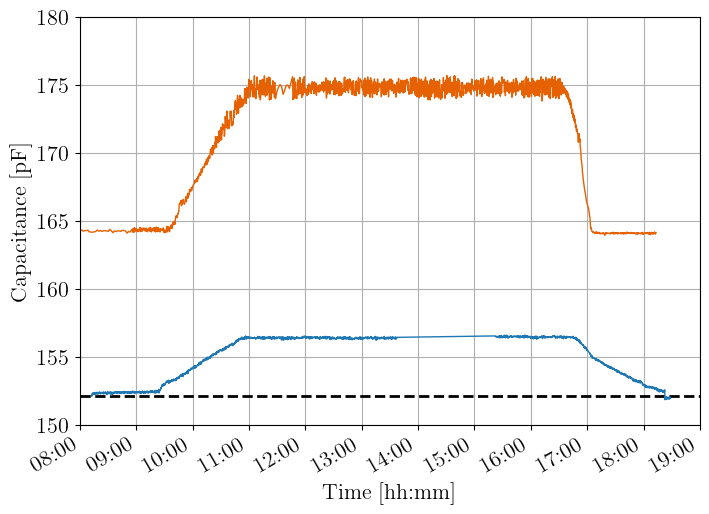

In [80]:
capdata = pd.read_csv("C:/Data/LevelMeter/20211110_liquefaction_16.csv", names=['Time', 'Level'])
timestamp = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") for x in capdata['Time']])
cap = np.array(capdata['Level'])
formatter = matplotlib.dates.DateFormatter('%H:%M')

fig = plt.figure()
ax = fig.gca()

XRange = [dt.datetime(2021,11,10,8,0), dt.datetime(2021,11,10,19,0)]

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('Time [hh:mm]')
plt.ylabel('Capacitance [pF]')

plt.xlim(XRange[0], XRange[1])
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=60))

cut = np.where((timestamp>XRange[0]) & (cap>0))
plt.plot(timestamp[cut][::10], cap[cut][::10], lw=1)
print(cap[cut][-1])
print(cap[cut][0])
cut_last = np.where((timestamp_last>XRange[0]) & (cap_last>0))
plt.errorbar(timestamp_last[cut_last][::10], cap_last[cut_last][::10], lw=1)

plt.hlines(y=cap[cut][0], xmin=XRange[0], xmax=XRange[1], ls='--', color='k')
             
plt.ylim(150,180)
plt.show() 